# Health Insurance Cross Sell Prediction

## Predviđanje vlasnika zdravstvenog osiguranja koje će zanimati osiguranje vozila

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

### Učitavanje podataka i upoznavanje dataseta

In [3]:
train_df = pd.read_csv('input/train.csv')
test_df = pd.read_csv('input/test.csv')

In [4]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
test_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [6]:
train_df.shape

(381109, 12)

In [7]:
test_df.shape

(127037, 11)

Vrednosti koje nedostaju:

In [8]:
train_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
test_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [10]:
train_df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [11]:
train_df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [12]:
numerical_columns = ["Age","Region_Code", "Annual_Premium", "Policy_Sales_Channel", "Vintage"]
categorical_columns = ["Gender","Driving_License", 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']

In [13]:
train_df[numerical_columns].describe()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,112.034295,154.347397
std,15.511611,13.229888,17213.155057,54.203995,83.671304
min,20.000000,0.000000,2630.000000,1.000000,10.000000
25%,25.000000,15.000000,24405.000000,29.000000,82.000000
50%,36.000000,28.000000,31669.000000,133.000000,154.000000
75%,49.000000,35.000000,39400.000000,152.000000,227.000000
max,85.000000,52.000000,540165.000000,163.000000,299.000000


Provera klase:

<AxesSubplot:xlabel='Response', ylabel='count'>

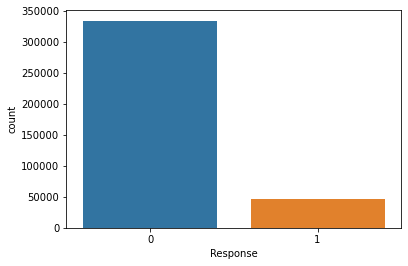

In [14]:
sns.countplot(x = train_df["Response"])

<AxesSubplot:xlabel='Gender', ylabel='count'>

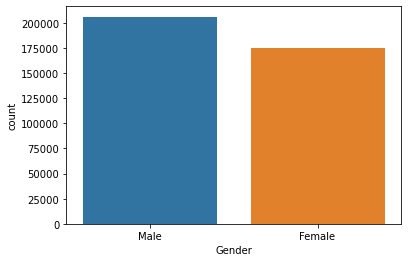

In [15]:
sns.countplot(x = train_df["Gender"])

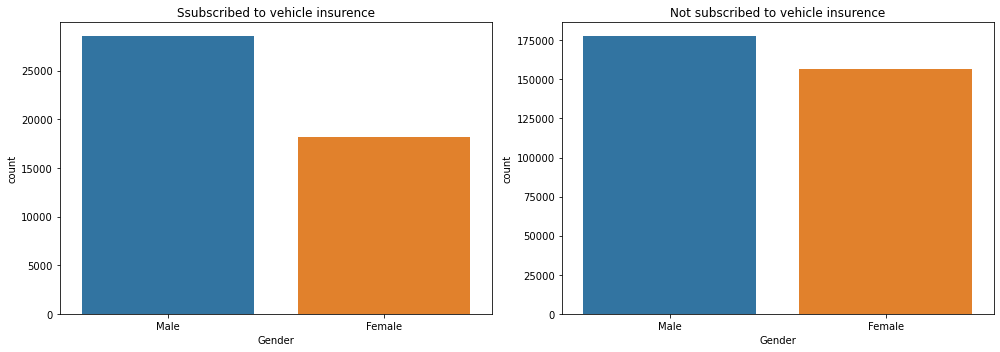

In [16]:
fig, axis = plt.subplots(1, 2, figsize = (14, 5))

sns.countplot(ax = axis[0], x = train_df[train_df["Response"] == 1]["Gender"])
axis[0].set_title("Ssubscribed to vehicle insurence")

sns.countplot(ax = axis[1], x = train_df[train_df["Response"] == 0]["Gender"])
axis[1].set_title("Not subscribed to vehicle insurence")

fig.tight_layout()

   Gender  Driving_License
0  Female           175020
1    Male           206089


<AxesSubplot:xlabel='Gender', ylabel='Driving_License'>

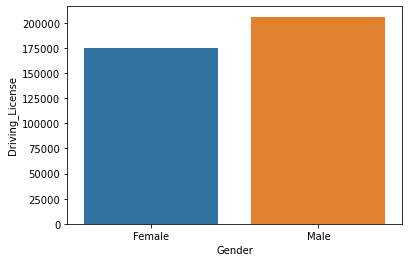

In [17]:
temp = train_df.groupby(["Gender"]).count()["Driving_License"].to_frame().reset_index()
print(temp)
sns.barplot(x = temp["Gender"], y = temp["Driving_License"])

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

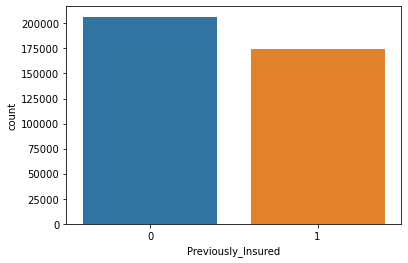

In [18]:
sns.countplot(x = train_df["Previously_Insured"])

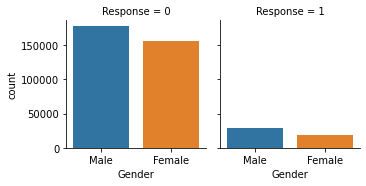

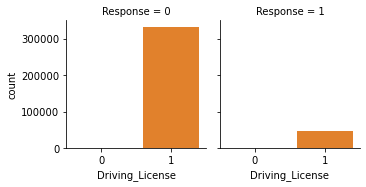

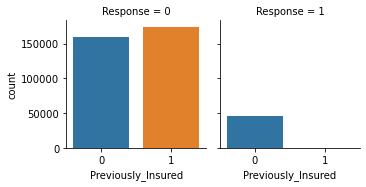

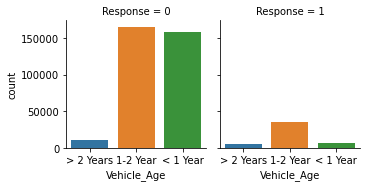

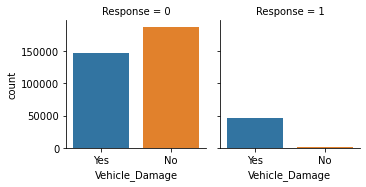

In [19]:
col = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']

for i, col in enumerate(col):
    sns.catplot(x=col, col='Response', col_wrap=2,data=train_df, kind="count", height=2.5, aspect=1)

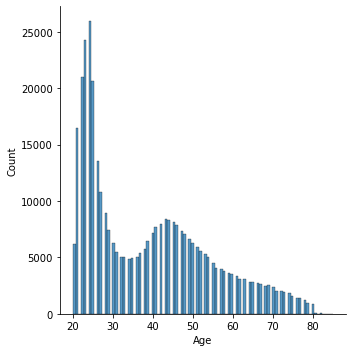

In [20]:
sns.displot(train_df.Age)

<AxesSubplot:xlabel='Age', ylabel='Annual_Premium'>

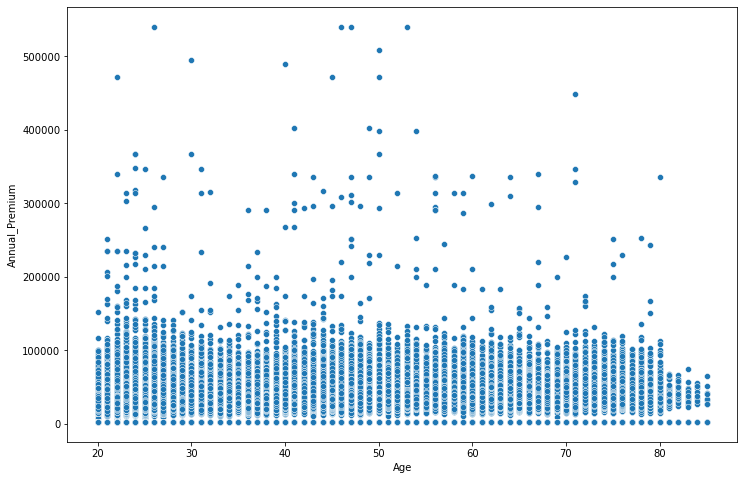

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=train_df['Age'],y=train_df['Annual_Premium'])

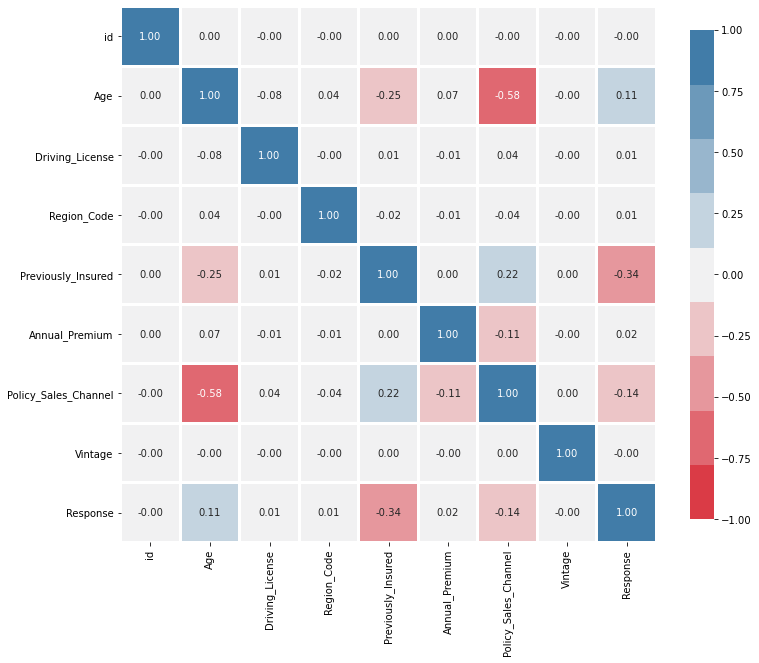

In [22]:
fig, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(10, 240, n=9)

train_corr = train_df.corr()
sns.heatmap(train_corr, annot=True, fmt=".2f", linewidths=2, cmap=cmap, vmin=-1, vmax=1, cbar_kws={"shrink": .9}, square=True);

### Priprema dataseta:

In [23]:
train_df['Gender'] = train_df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [24]:
train_data=pd.get_dummies(train_df,drop_first=True)

In [25]:
train_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,1
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,0,0,0
2,3,1,47,1,28.0,0,38294.0,26.0,27,1,0,1,1
3,4,1,21,1,11.0,1,28619.0,152.0,203,0,1,0,0
4,5,0,29,1,41.0,1,27496.0,152.0,39,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,30170.0,26.0,88,0,0,0,0
381105,381106,1,30,1,37.0,1,40016.0,152.0,131,0,1,0,0
381106,381107,1,21,1,30.0,1,35118.0,160.0,161,0,1,0,0
381107,381108,0,68,1,14.0,0,44617.0,124.0,74,0,0,1,1


In [26]:
train_data=train_data.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
train_data['Vehicle_Age_lt_1_Year']=train_data['Vehicle_Age_lt_1_Year'].astype('int')
train_data['Vehicle_Age_gt_2_Years']=train_data['Vehicle_Age_gt_2_Years'].astype('int')
train_data['Vehicle_Damage_Yes']=train_data['Vehicle_Damage_Yes'].astype('int')

In [27]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,1
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,0,0,0
2,3,1,47,1,28.0,0,38294.0,26.0,27,1,0,1,1
3,4,1,21,1,11.0,1,28619.0,152.0,203,0,1,0,0
4,5,0,29,1,41.0,1,27496.0,152.0,39,0,1,0,0


In [28]:
numeric_features = ['Age','Vintage']

In [29]:
ss = StandardScaler()
train_data[numeric_features] = ss.fit_transform(train_data[numeric_features])

In [30]:
mm = MinMaxScaler()
train_data[['Annual_Premium']] = mm.fit_transform(train_data[['Annual_Premium']])

In [31]:
train_data=train_data.drop('id',axis=1)

In [32]:
train_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,1,0,1,1
1,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,0,0
2,1,0.527181,1,28.0,0,0.066347,26.0,-1.521998,1,0,1,1
3,1,-1.148985,1,11.0,1,0.048348,152.0,0.581474,0,1,0,0
4,0,-0.633242,1,41.0,1,0.046259,152.0,-1.378580,0,1,0,0


In [33]:
test_df['Gender'] = test_df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [34]:
test_data=pd.get_dummies(test_df,drop_first=True)

In [35]:
test_data=test_data.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", 
                                    "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
test_data['Vehicle_Age_lt_1_Year']=test_data['Vehicle_Age_lt_1_Year'].astype('int')
test_data['Vehicle_Age_gt_2_Years']=test_data['Vehicle_Age_gt_2_Years'].astype('int')
test_data['Vehicle_Damage_Yes']=test_data['Vehicle_Damage_Yes'].astype('int')

In [36]:
test_data[numeric_features] = ss.transform(test_data[numeric_features])
test_data[['Annual_Premium']] = mm.fit_transform(test_data[['Annual_Premium']])

In [37]:
test_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,381110,1,-0.891113,1,11.0,1,0.070633,152.0,-1.211258,1,0,0
1,381111,1,0.075906,1,28.0,0,0.066321,7.0,-0.518068,0,0,1
2,381112,1,0.527181,1,28.0,0,0.079717,124.0,0.533668,0,0,1
3,381113,1,-0.955581,1,27.0,1,0.073978,152.0,0.390249,1,0,1
4,381114,1,-0.762177,1,28.0,1,0.120293,152.0,1.704919,1,0,0


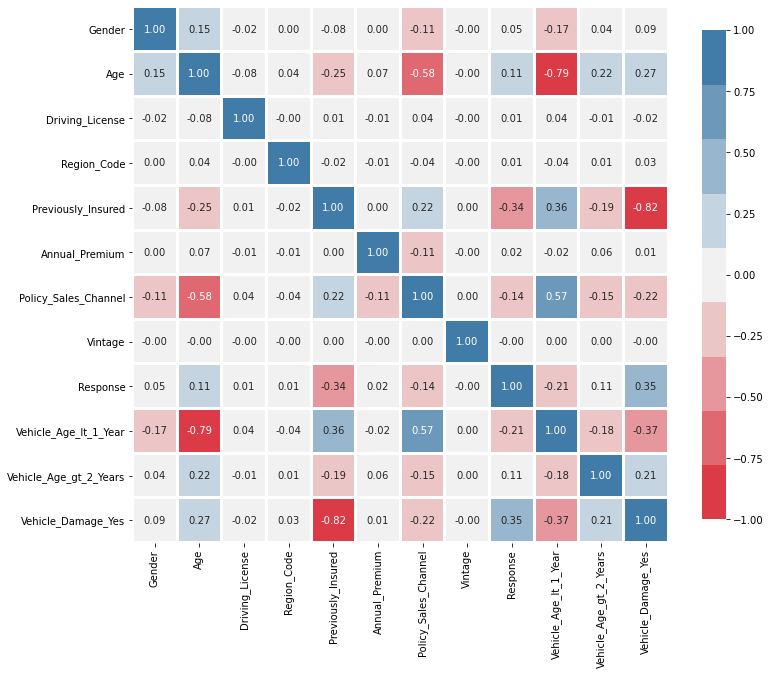

In [38]:
fig, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(10, 240, n=9)

train_data_corr = train_data.corr()
sns.heatmap(train_data_corr, annot=True, fmt=".2f", linewidths=2, cmap=cmap, vmin=-1, vmax=1, cbar_kws={"shrink": .9}, square=True);

### Train i test dataset 

In [39]:
id=test_data.id
test_data=test_data.drop('id',axis=1)

In [40]:
train_target=train_data['Response']
train_data=train_data.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train_data,train_target, random_state = 0)

In [41]:
sm = SMOTE(random_state=2)
x_train, y_train = sm.fit_resample(x_train, y_train)

## Treniranje mreže

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from tensorflow.keras import backend as K

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, recall_score, classification_report, precision_score

### Modeli sa dva Dense sloja

In [45]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
opt = Adam(learning_rate=0.01)

In [49]:
def build_model_two_layers(optimizer, loss_function, add_dropout = False):

    K.clear_session()

    model = Sequential()
    model.add(tf.keras.Input(shape=(11,)))
    model.add(Dense(11, activation='relu'))
    if add_dropout:
        model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])
    return model

### Model bez Dropout regularizacije

In [50]:
model_1 = build_model_two_layers(opt, 'binary_crossentropy')

In [51]:
history_1 = model_1.fit(x=x_train, y=y_train, epochs=50, batch_size=100, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/50
5016/5016 [==============================] - 9s 2ms/step - loss: 0.4775 - accuracy: 0.7740 - val_loss: 0.5653 - val_accuracy: 0.6334
Epoch 2/50
5016/5016 [==============================] - 9s 2ms/step - loss: 0.4373 - accuracy: 0.7818 - val_loss: 0.5216 - val_accuracy: 0.6360
Epoch 3/50
5016/5016 [==============================] - 9s 2ms/step - loss: 0.4312 - accuracy: 0.7870 - val_loss: 0.4963 - val_accuracy: 0.6677
Epoch 4/50
5016/5016 [==============================] - 9s 2ms/step - loss: 0.4285 - accuracy: 0.7900 - val_loss: 0.5077 - val_accuracy: 0.6670
Epoch 5/50
5016/5016 [==============================] - 9s 2ms/step - loss: 0.4277 - accuracy: 0.7919 - val_loss: 0.5205 - val_accuracy: 0.6585
Epoch 6/50
5016/5016 [==============================] - 9s 2ms/step - loss: 0.4269 - accuracy: 0.7921 - val_loss: 0.4827 - val_accuracy: 0.7048
Epoch 7/50
5016/5016 [==============================] - 9s 2ms/step - loss: 0.4264 - accuracy: 0.7922 - val_loss: 0.4787 - val_accuracy:

In [52]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

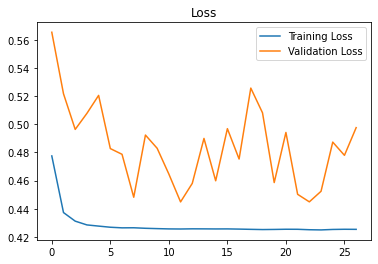

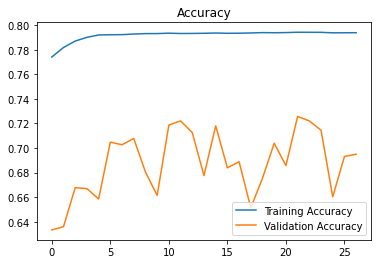

In [53]:
plot_metrics(history_1.history)

In [70]:
pred_1 = (model_1.predict(x_test) > 0.5).astype("int32")

In [55]:
def print_data(y_test, pred):
    print(classification_report(y_test, pred))
    print('-----------------------------------------------------------------')
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('-----------------------------------------------------------------')
    print('accuracy: ', accuracy)
    print('-----------------------------------------------------------------')
    print('recall: ', recall)
    print('-----------------------------------------------------------------')
    print('precision: ', precision)
    print('-----------------------------------------------------------------')
    print('f1_score: ', f1)
    print('-----------------------------------------------------------------')
    print('ROC AUC Score:', roc_auc_score(y_test, pred, average = 'weighted'))
    print('-----------------------------------------------------------------')

In [71]:
print_data(y_test, pred_1)

              precision    recall  f1-score   support

           0       0.98      0.66      0.79     83603
           1       0.28      0.92      0.42     11675

    accuracy                           0.69     95278
   macro avg       0.63      0.79      0.61     95278
weighted avg       0.90      0.69      0.75     95278

-----------------------------------------------------------------
-----------------------------------------------------------------
accuracy:  0.6949453179117949
-----------------------------------------------------------------
recall:  0.9186295503211992
-----------------------------------------------------------------
precision:  0.27613285272914523
-----------------------------------------------------------------
f1_score:  0.42462634860932397
-----------------------------------------------------------------
ROC AUC Score: 0.7911688952280614
-----------------------------------------------------------------


In [57]:
def confusion_matrix_plot(confusion):
    ax= plt.subplot()
    sns.heatmap(confusion, annot=True, ax = ax, fmt='g')

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

In [58]:
confusion_1 = confusion_matrix(y_test, pred_1)

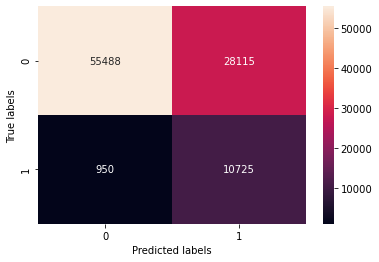

In [59]:
confusion_matrix_plot(confusion_1)

### Model sa Dropout regularizacijom

In [60]:
model_2 = build_model_two_layers(opt, 'binary_crossentropy', True)

In [61]:
history_2 = model_2.fit(x=x_train, y=y_train, epochs=50, batch_size=100, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/50
5016/5016 [==============================] - 10s 2ms/step - loss: 0.5019 - accuracy: 0.7214 - val_loss: 0.4390 - val_accuracy: 0.6558
Epoch 2/50
5016/5016 [==============================] - 9s 2ms/step - loss: 0.4872 - accuracy: 0.7261 - val_loss: 0.4817 - val_accuracy: 0.6369
Epoch 3/50
5016/5016 [==============================] - 9s 2ms/step - loss: 0.4717 - accuracy: 0.7462 - val_loss: 0.5033 - val_accuracy: 0.6388
Epoch 4/50
5016/5016 [==============================] - 9s 2ms/step - loss: 0.4537 - accuracy: 0.7696 - val_loss: 0.5074 - val_accuracy: 0.6338
Epoch 5/50
5016/5016 [==============================] - 10s 2ms/step - loss: 0.4532 - accuracy: 0.7708 - val_loss: 0.4534 - val_accuracy: 0.6313
Epoch 6/50
5016/5016 [==============================] - 9s 2ms/step - loss: 0.4529 - accuracy: 0.7715 - val_loss: 0.5054 - val_accuracy: 0.6292
Epoch 7/50
5016/5016 [==============================] - 9s 2ms/step - loss: 0.4527 - accuracy: 0.7714 - val_loss: 0.4665 - val_accurac

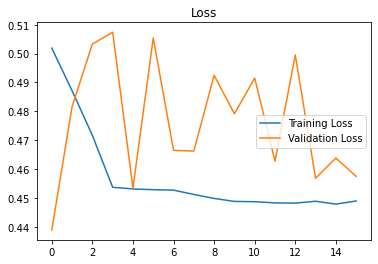

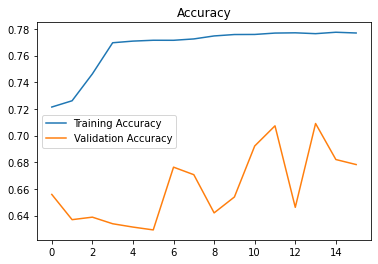

In [62]:
plot_metrics(history_2.history)

In [66]:
pred_2 = (model_2.predict(x_test) > 0.5).astype("int32")

In [67]:
print_data(y_test, pred_2)

              precision    recall  f1-score   support

           0       0.99      0.64      0.78     83603
           1       0.27      0.94      0.42     11675

    accuracy                           0.68     95278
   macro avg       0.63      0.79      0.60     95278
weighted avg       0.90      0.68      0.73     95278

-----------------------------------------------------------------
-----------------------------------------------------------------
accuracy:  0.6782258233800038
-----------------------------------------------------------------
recall:  0.9380728051391863
-----------------------------------------------------------------
precision:  0.2678602000635899
-----------------------------------------------------------------
f1_score:  0.41672691297895814
-----------------------------------------------------------------
ROC AUC Score: 0.7900057457749806
-----------------------------------------------------------------


In [68]:
confusion_2 = confusion_matrix(y_test, pred_2)

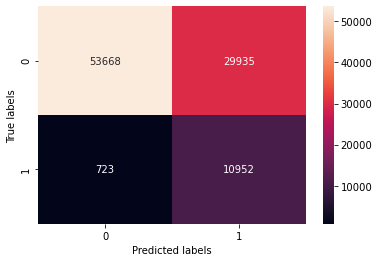

In [69]:
confusion_matrix_plot(confusion_2)

### Modeli sa tri Dense sloja

In [98]:
def build_model_three_layers(optimizer, loss_function, add_dropout = False):
    
    K.clear_session()

    model = Sequential()
    model.add(tf.keras.Input(shape=(11,)))
    model.add(Dense(11, activation='relu'))
    model.add(Dense(5, activation='relu'))
    if add_dropout:
        model.add(Dropout(0.2))

    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])
    return model

### Model bez Dropout regularizacije

In [83]:
model_3 = build_model_three_layers(opt, 'binary_crossentropy')

In [84]:
history_3 = model_3.fit(x=x_train, y=y_train, epochs=50, batch_size=100, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/50
5016/5016 [==============================] - 9s 2ms/step - loss: 0.4550 - accuracy: 0.7736 - val_loss: 0.5309 - val_accuracy: 0.6492
Epoch 2/50
5016/5016 [==============================] - 9s 2ms/step - loss: 0.4356 - accuracy: 0.7821 - val_loss: 0.4356 - val_accuracy: 0.6129
Epoch 3/50
5016/5016 [==============================] - 9s 2ms/step - loss: 0.4345 - accuracy: 0.7836 - val_loss: 0.5061 - val_accuracy: 0.6385
Epoch 4/50
5016/5016 [==============================] - 9s 2ms/step - loss: 0.4334 - accuracy: 0.7841 - val_loss: 0.4951 - val_accuracy: 0.6334
Epoch 5/50
5016/5016 [==============================] - 9s 2ms/step - loss: 0.4330 - accuracy: 0.7844 - val_loss: 0.4642 - val_accuracy: 0.6510
Epoch 6/50
5016/5016 [==============================] - 9s 2ms/step - loss: 0.4327 - accuracy: 0.7842 - val_loss: 0.5107 - val_accuracy: 0.6428
Epoch 7/50
5016/5016 [==============================] - 9s 2ms/step - loss: 0.4322 - accuracy: 0.7844 - val_loss: 0.4959 - val_accuracy:

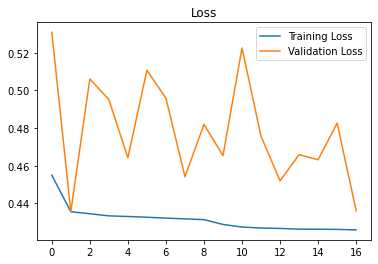

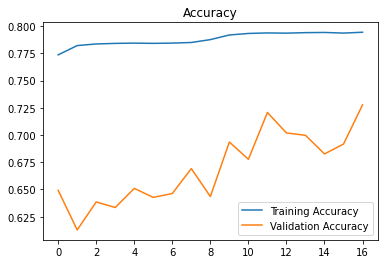

In [85]:
plot_metrics(history_3.history)

In [86]:
pred_3 = (model_3.predict(x_test) > 0.5).astype("int32")

In [87]:
print_data(y_test, pred_3)

              precision    recall  f1-score   support

           0       0.97      0.71      0.82     83603
           1       0.29      0.86      0.44     11675

    accuracy                           0.73     95278
   macro avg       0.63      0.79      0.63     95278
weighted avg       0.89      0.73      0.77     95278

-----------------------------------------------------------------
-----------------------------------------------------------------
accuracy:  0.7276706060160792
-----------------------------------------------------------------
recall:  0.8614989293361884
-----------------------------------------------------------------
precision:  0.29248575084331746
-----------------------------------------------------------------
f1_score:  0.43670625013568376
-----------------------------------------------------------------
ROC AUC Score: 0.785240332220694
-----------------------------------------------------------------


In [88]:
confusion_3 = confusion_matrix(y_test, pred_3)

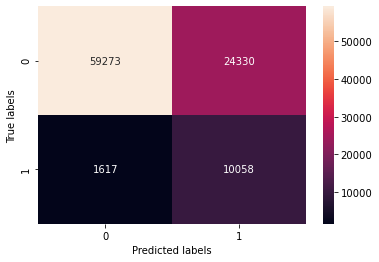

In [89]:
confusion_matrix_plot(confusion_3)

### Model sa Dropout regularizacijom

In [99]:
model_4 = build_model_three_layers(opt, 'binary_crossentropy', True)

In [100]:
history_4 = model_4.fit(x=x_train, y=y_train, epochs=50, batch_size=100, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/50
5016/5016 [==============================] - 9s 2ms/step - loss: 0.5859 - accuracy: 0.7212 - val_loss: 0.5795 - val_accuracy: 0.7047
Epoch 2/50
5016/5016 [==============================] - 9s 2ms/step - loss: 0.5048 - accuracy: 0.7310 - val_loss: 0.4532 - val_accuracy: 0.6763
Epoch 3/50
5016/5016 [==============================] - 10s 2ms/step - loss: 0.4820 - accuracy: 0.7316 - val_loss: 0.5020 - val_accuracy: 0.6323
Epoch 4/50
5016/5016 [==============================] - 9s 2ms/step - loss: 0.4572 - accuracy: 0.7638 - val_loss: 0.4289 - val_accuracy: 0.7238
Epoch 5/50
5016/5016 [==============================] - 10s 2ms/step - loss: 0.4448 - accuracy: 0.7783 - val_loss: 0.5085 - val_accuracy: 0.6424
Epoch 6/50
5016/5016 [==============================] - 10s 2ms/step - loss: 0.4448 - accuracy: 0.7791 - val_loss: 0.4664 - val_accuracy: 0.6968
Epoch 7/50
5016/5016 [==============================] - 10s 2ms/step - loss: 0.4443 - accuracy: 0.7793 - val_loss: 0.4690 - val_accur

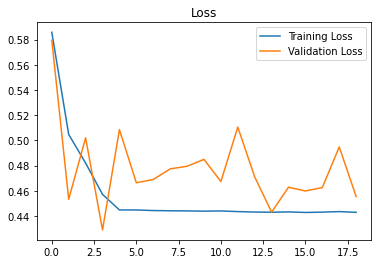

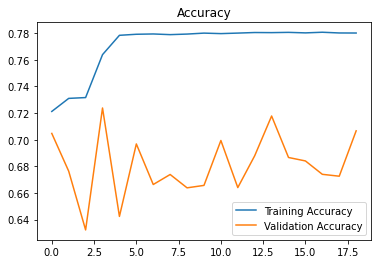

In [101]:
plot_metrics(history_4.history)

In [102]:
pred_4 = (model_4.predict(x_test) > 0.5).astype("int32")
print_data(y_test, pred_4)

              precision    recall  f1-score   support

           0       0.98      0.68      0.80     83603
           1       0.28      0.90      0.43     11675

    accuracy                           0.71     95278
   macro avg       0.63      0.79      0.62     95278
weighted avg       0.89      0.71      0.76     95278

-----------------------------------------------------------------
-----------------------------------------------------------------
accuracy:  0.7066164277167867
-----------------------------------------------------------------
recall:  0.9011563169164882
-----------------------------------------------------------------
precision:  0.28191318327974274
-----------------------------------------------------------------
f1_score:  0.42947239514236135
-----------------------------------------------------------------
ROC AUC Score: 0.7903028094875134
-----------------------------------------------------------------


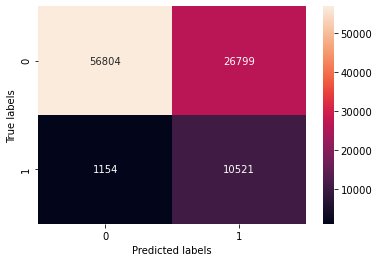

In [103]:
confusion_4 = confusion_matrix(y_test, pred_4)
confusion_matrix_plot(confusion_4)

Dodavanje dropout-a ne povećava accuracy.

### Modeli sa četiri Dense sloja

In [132]:
def build_model_four_layers(optimizer, loss_function):
    
    K.clear_session()

    model = Sequential()
    model.add(tf.keras.Input(shape=(11,)))
    model.add(Dense(11, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])
    return model

In [133]:
model_5 = build_model_four_layers(opt, 'binary_crossentropy')

In [135]:
history_5 = model_5.fit(x=x_train, y=y_train, epochs=50, batch_size=100, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/50
5016/5016 [==============================] - 10s 2ms/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.7016 - val_accuracy: 0.1225
Epoch 2/50
5016/5016 [==============================] - 10s 2ms/step - loss: 0.6933 - accuracy: 0.4995 - val_loss: 0.6923 - val_accuracy: 0.8775
Epoch 3/50
5016/5016 [==============================] - 10s 2ms/step - loss: 0.6933 - accuracy: 0.4989 - val_loss: 0.6722 - val_accuracy: 0.8775
Epoch 4/50
5016/5016 [==============================] - 10s 2ms/step - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6972 - val_accuracy: 0.1225
Epoch 5/50
5016/5016 [==============================] - 10s 2ms/step - loss: 0.6933 - accuracy: 0.5008 - val_loss: 0.6804 - val_accuracy: 0.8775
Epoch 6/50
5016/5016 [==============================] - 9s 2ms/step - loss: 0.6933 - accuracy: 0.5005 - val_loss: 0.7112 - val_accuracy: 0.1225
Epoch 7/50
5016/5016 [==============================] - 9s 2ms/step - loss: 0.6933 - accuracy: 0.4997 - val_loss: 0.7039 - val_accu

Već sa četiri sloja imamo problem overfitting-a.

Text(0.5, 0, 'Models')

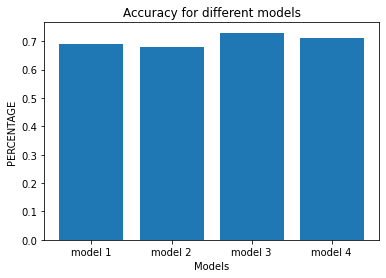

In [137]:
name =[ 'model 1','model 2', 'model 3','model 4']
accuracy = (round(accuracy_score(y_test, pred_1), 2),round(accuracy_score(y_test, pred_2), 2),round(accuracy_score(y_test, pred_3), 2),round(accuracy_score(y_test, pred_4), 2))
bars=plt.bar(name, accuracy)
plt.title("Accuracy for different models")
plt.ylabel('PERCENTAGE')
plt.xlabel('Models')

Najbolje se pokazao model sa 3 Dense sloja, bez Dropout regularizacije.